### In this nb we will use the improvements made in Exploratory3 to analyse more scenarios.

In [1]:
from utils import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
statsmodels: 0.13.0


## General Models

### EPU

In [2]:
wti = load('data/WTI.csv').pct_change().dropna()
spot = clean_series('spot', wti)
c1 = clean_series('contract_1', wti)
c3 = clean_series('contract_3', wti)

In [3]:
epu = load('data/EPUGlobal.csv')
epu_shock = calc_shock('GEPU_current', epu)

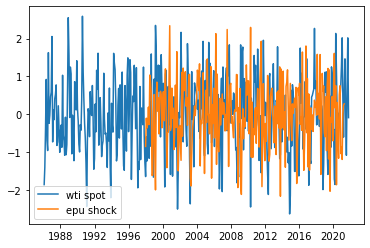

In [4]:
plt.plot(spot, label='wti spot')
plt.plot(epu_shock, label='epu shock')
plt.legend()

In [5]:
model1 = dl('spot', 'GEPU_current', spot.join(epu_shock))
model2 = dl('contract_1', 'GEPU_current', c1.join(epu_shock))
model3 = dl('contract_3', 'GEPU_current', c3.join(epu_shock))

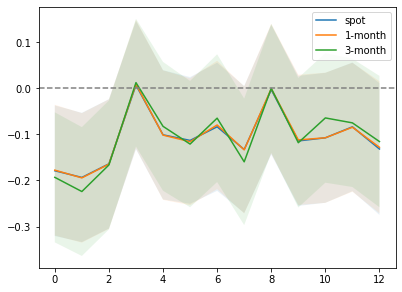

In [6]:
draw((model1, model2, model3),
    labels=('spot', '1-month', '3-month')
    )

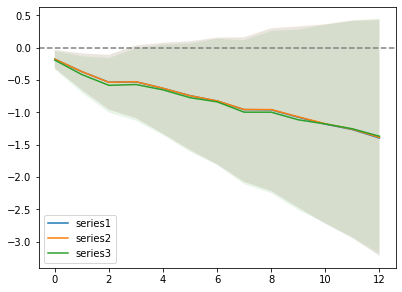

In [7]:
draw((model1, model2, model3), cumulative=True)

In [8]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

### GPR

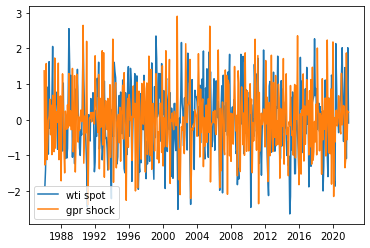

In [9]:
plt.plot(spot, label='wti spot')
plt.plot(gpr_shock, label='gpr shock')
plt.legend()

In [10]:
model4 = dl('spot', 'GPRI', spot.join(gpr_shock))
model5 = dl('contract_1', 'GPRI', c1.join(gpr_shock))
model6 = dl('contract_3', 'GPRI', c3.join(gpr_shock))

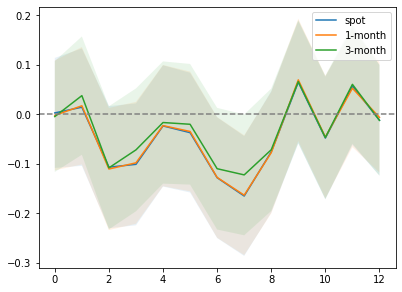

In [11]:
draw((model4, model5, model6),
     labels=('spot', '1-month', '3-month')
    )

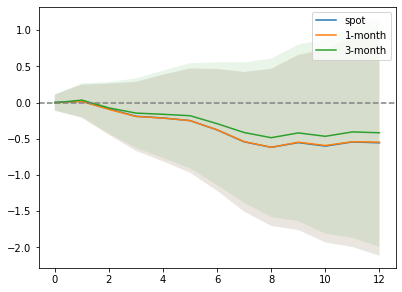

In [12]:
draw((model4, model5, model6),
     labels=('spot', '1-month', '3-month'),
     cumulative=True)

## Time Slicing

### GPR Pre & Post Iraq

In [13]:
model7 = dl('spot', 'GPRI', spot.join(gpr_shock)[:'2005-01-01'])
model8 = dl('spot', 'GPRI', spot.join(gpr_shock)['2005-01-01':])

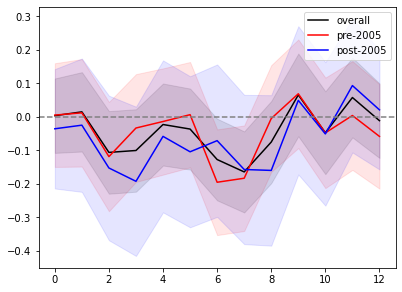

In [14]:
draw((model4, model7, model8), 
     labels=('overall', 'pre-2005', 'post-2005'),
     colors=('black', 'red', 'blue')
    )

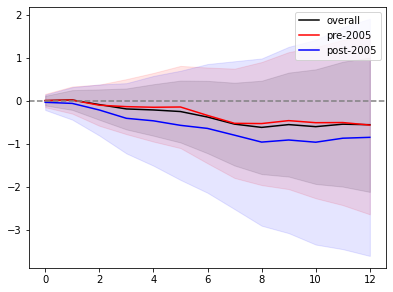

In [15]:
draw((model4, model7, model8), 
     labels=('overall', 'pre-2005', 'post-2005'),
     colors=('black', 'red', 'blue'),
     cumulative=True
    )

### EPU Pre & Post GFC

In [16]:
model9 = dl('spot', 'GEPU_current', spot.join(epu_shock)[:'2010-01-01'])
model10 = dl('spot', 'GEPU_current', spot.join(epu_shock)['2010-01-01':])

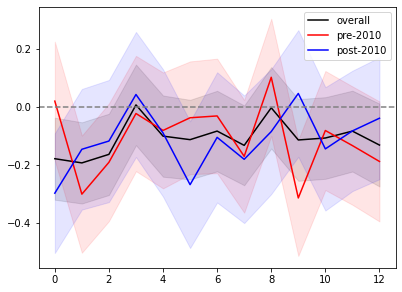

In [17]:
draw((model1, model9, model10), 
     labels=('overall', 'pre-2010', 'post-2010'),
     colors=('black', 'red', 'blue')
    )

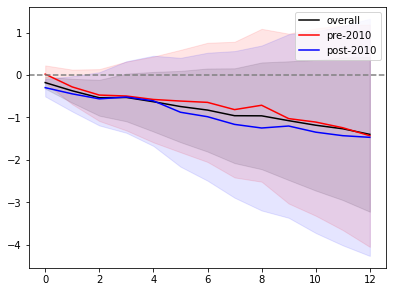

In [18]:
draw((model1, model9, model10), 
     labels=('overall', 'pre-2010', 'post-2010'),
     colors=('black', 'red', 'blue'),
     cumulative=True
    )

I wonder if the result will be robust to the removal of the GFC period.

In [19]:
model11 = dl('spot', 'GEPU_current', spot.join(epu_shock)[:'2007-01-01'])

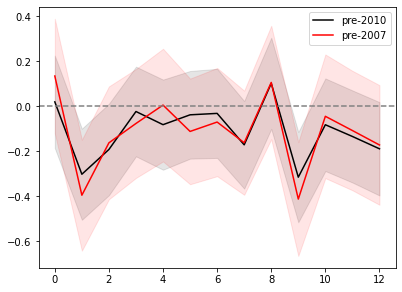

In [20]:
draw((model9, model11), 
     labels=('pre-2010', 'pre-2007'),
     colors=('black', 'red')
    )